# Automated Image Registration

In [53]:
%matplotlib notebook
import image_registration as ir
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.ndimage.interpolation import rotate

# s0506_15

In [54]:
cd "~/Google Drive/MAGPIE/data/2015/s0506_15 RECONNECTION\s0506_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION\s0506_15


In [55]:
B0=plt.imread("06-May-2015 12_56_47_1355463638.png")
B1=plt.imread("06-May-2015 12_56_47_2211629970.png")
S0=plt.imread("06-May-2015 13_19_22_1355463638.png")
S1=plt.imread("06-May-2015 13_19_22_2211629970.png")

In [56]:
BT, ST, scale, angle, (t0, t1)=ir.transform_like(B0,B1, S1)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


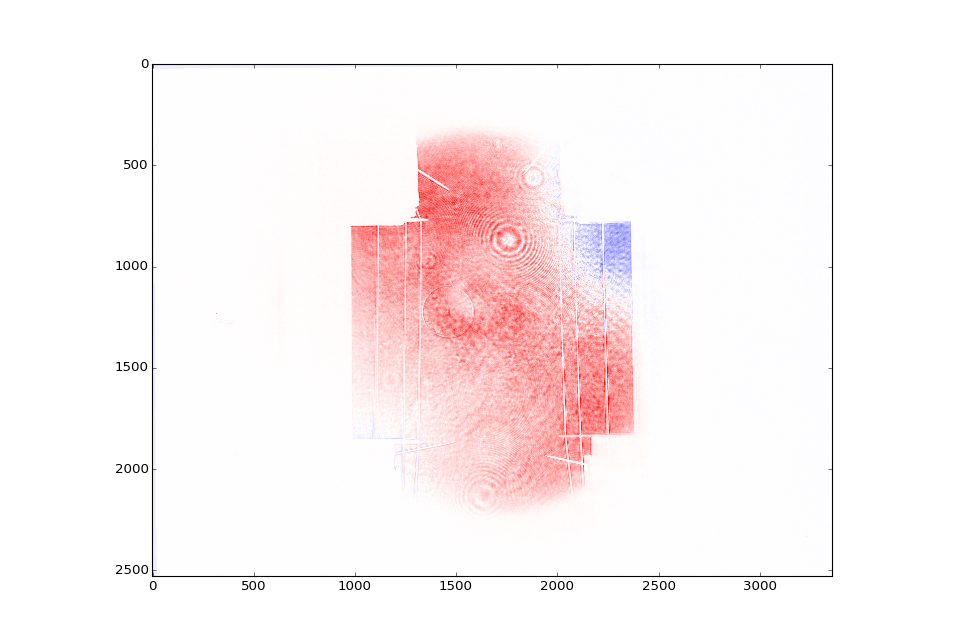

In [57]:
IR_check=BT-B0
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(IR_check, cmap=plt.cm.bwr,clim=[-0.1,0.1])

<IPython.core.display.Javascript object>


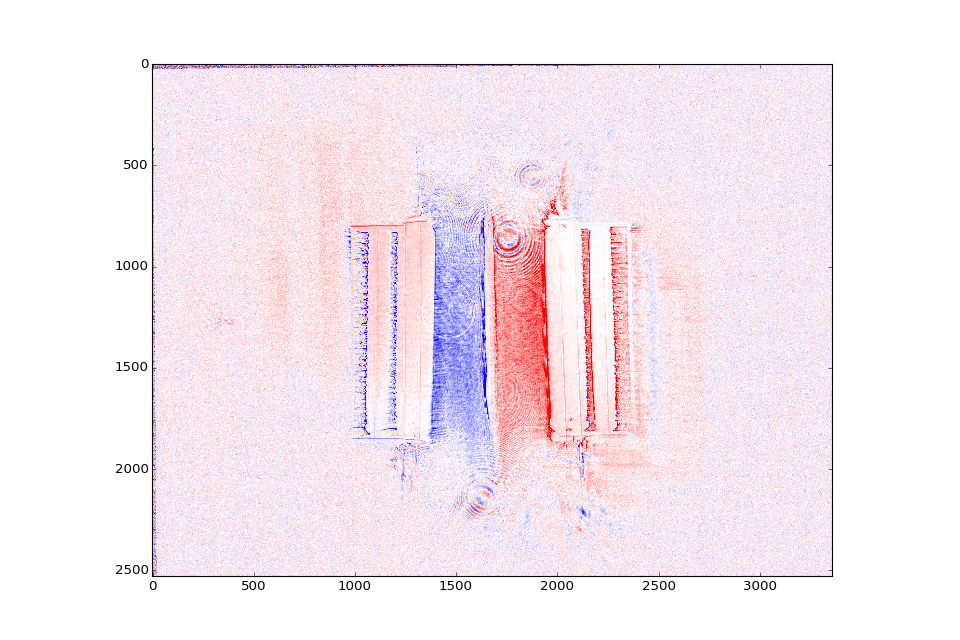

In [58]:
N0=S0/B0
N1=ST/BT
diff=N0-N1
#cmap=plt.cm.bwr,
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(diff, cmap=plt.cm.bwr,clim=[-1,1])

In [59]:
beta=3*np.pi/180
alpha=0.5*np.arcsin(diff*np.tan(beta)/2.0)
alpha=alpha*180/np.pi
alpha=np.nan_to_num(alpha)

<IPython.core.display.Javascript object>


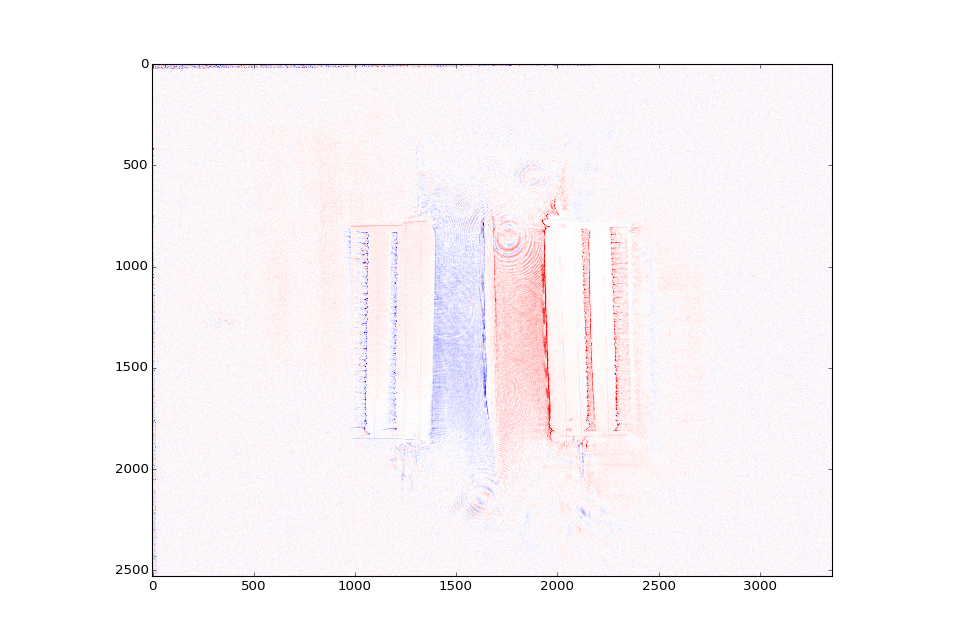

In [60]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(alpha, cmap=plt.cm.bwr,clim=[-2,2])

In [61]:
#rotate
dx=1672-1660
dy=1568-846
theta=180/np.pi*np.arctan(dx/dy)

In [62]:
alpha_rot=rotate(alpha, -theta)

<IPython.core.display.Javascript object>


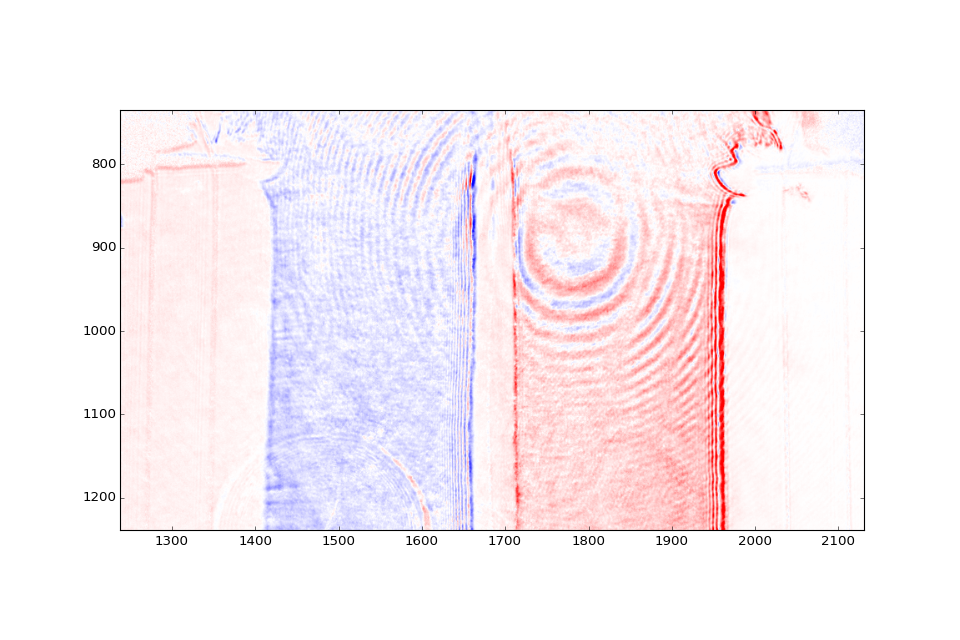

In [63]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(alpha_rot, cmap=plt.cm.bwr,clim=[-2,2])

In [64]:
alpha_dz=np.mean(alpha_rot[1000:1400,1400:1900], axis=0)

<IPython.core.display.Javascript object>


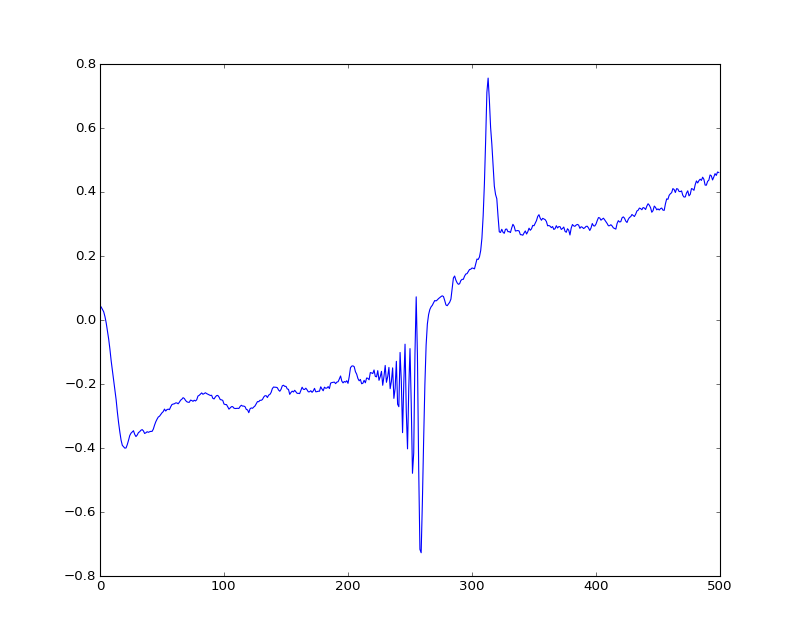

In [65]:
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(alpha_dz)

In [72]:
%cd "~/Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION"
neL_data=np.loadtxt('s0506_15_Densitynew.dat', delimiter=',')

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION


<IPython.core.display.Javascript object>


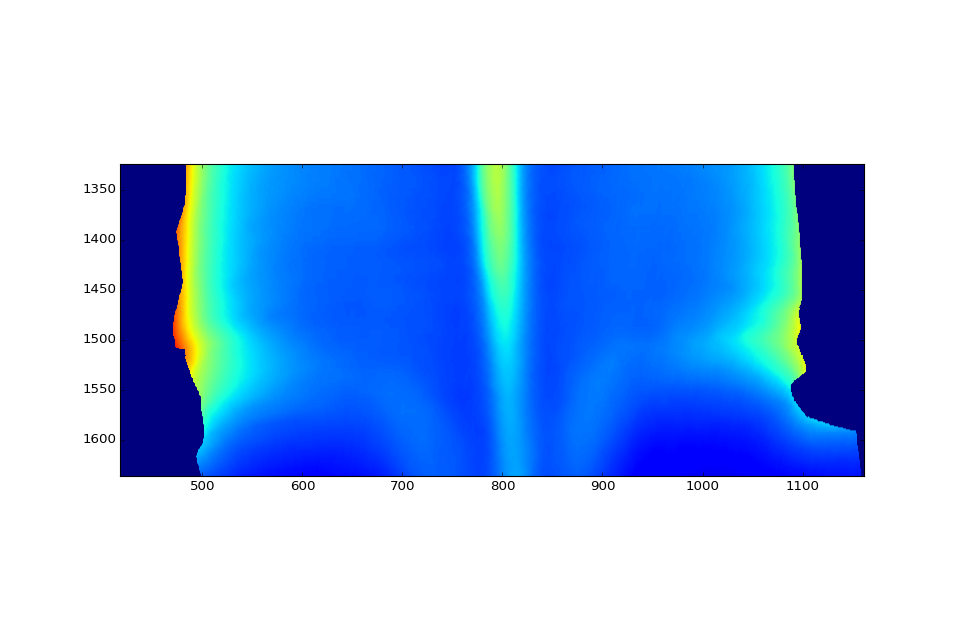

In [73]:
neL_data=np.nan_to_num(neL_data)
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(neL_data)

In [159]:
neL=np.mean(neL_data[661:1061,:], axis=0)
c_ne=783
y_mm=np.linspace(-500,500,1000)/61.0
neL=neL[c_ne-500:c_ne+500]

In [67]:
y_mm=neL_data[:,0]
neL=neL_data[:,1]

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


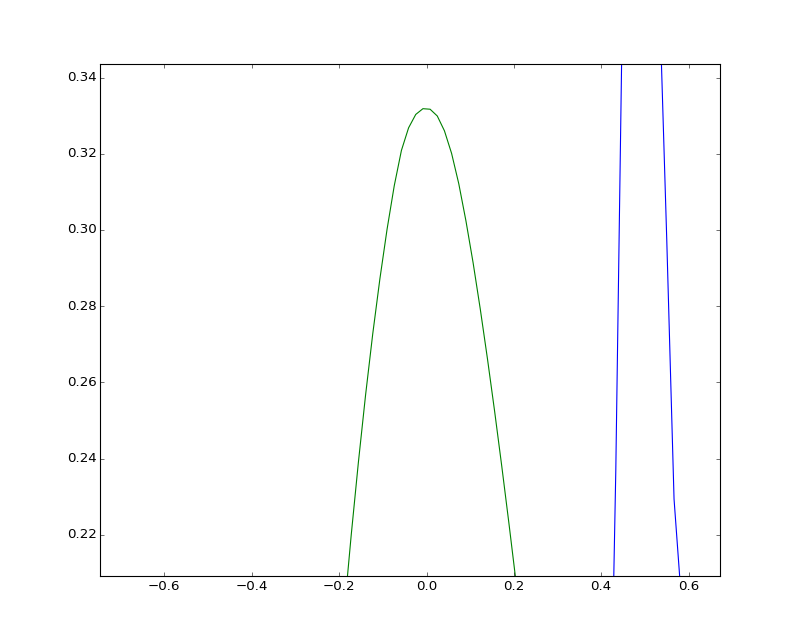

In [160]:
y=(np.arange(alpha_dz.size)-284)/60
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(y,alpha_dz-0.189)
ax.plot(y_mm,neL/3e18-0.5)

In [177]:
neL_interp=np.interp(y, y_mm, neL)
B=5.99e18*(alpha_dz-0.06)/neL_interp

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


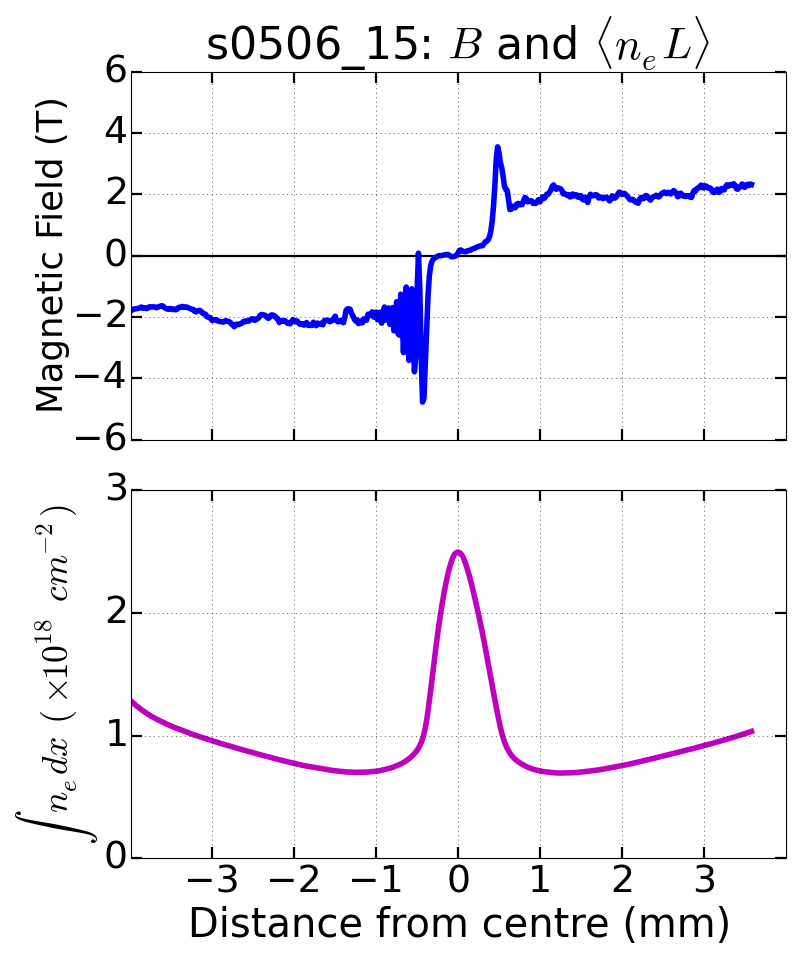

In [178]:
fig, (ax1,ax2)= plt.subplots(2, sharex=True, figsize=(10,12))

plot_line=ax1.plot([-4, 4], [0, 0], color='k', linewidth=2)
plot_B=ax1.plot(y,B, label='Magnetic Field', color='b', lw=5)
plot_ne=ax2.plot(y,neL_interp/1e18, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-4,4])
ax1.set_xticks(np.arange(-3,3+1,1))
ax2.set_xlabel('Distance from centre (mm)', fontsize=36)
ax1.set_ylim([-6,6])
ax1.set_yticks(np.arange(-6,7,2))
ax1.set_ylabel('Magnetic Field (T)',fontsize=32)

ax2.set_ylim([0,3])
ax2.set_yticks(np.arange(0,4,1))

ax2.set_ylabel(r'$\int \,n_e dx \,(\times 10^{18}\,cm^{-2})$',fontsize=32)
ax1.tick_params(labelsize=34, pad=5, length=10, width=2)
ax2.tick_params(labelsize=34, pad=5, length=10, width=2)
ax1.set_title(r's0506_15: $B$ and $\langle n_e L\rangle$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
fig.tight_layout()

In [179]:
fig.savefig('s0506_15 B and neL.png')

In [180]:
import csv
filename="s0506_15 B neL"
data=zip(y, B, neL_interp)
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    for f in data:
        cwriter.writerow(f)

 - Adding parameter for hint "B0"
 - Adding parameter for hint "y0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "y0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


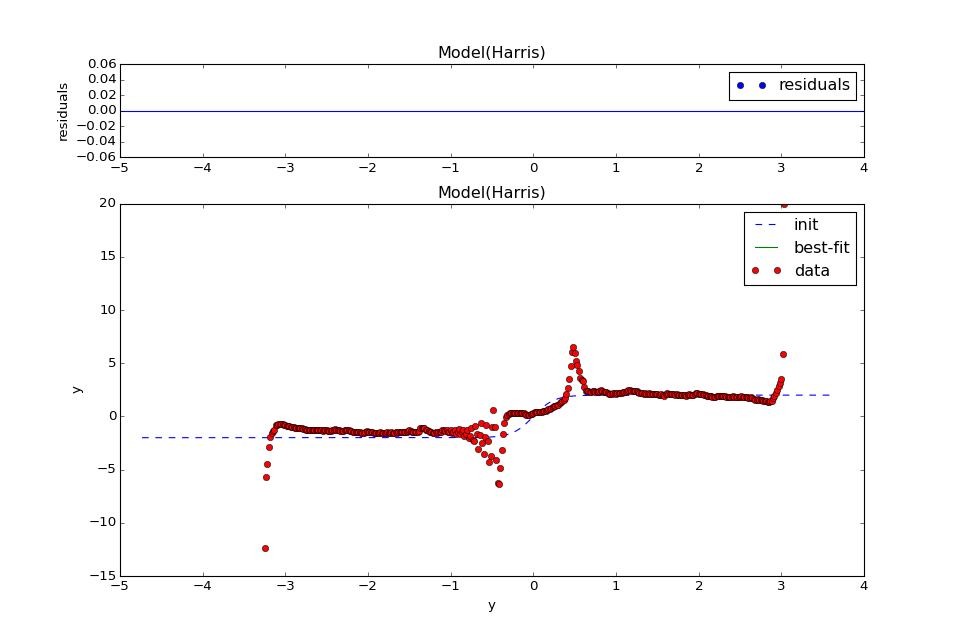

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 10003
    # data points      = 500
    # variables        = 4
    chi-square         = nan
    reduced chi-square = nan
[[Variables]]
    B0:  -inf        +/- 0        (0.00%) (init= 2)
    y0:  -inf        +/- 0        (0.00%) (init= 0)
    L:   -inf        +/- 0        (0.00%) (init= 0.25)
    C:   -inf        +/- 0        (0.00%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)



In [103]:
from lmfit import Model
def Harris(y, y0, B0, L,C):
    return B0*np.tanh((y-y0)/L)+C
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(B, y=y)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(12,8)})
print(res.fit_report())

# s0513_15

In [2]:
cd "~/Google Drive/MAGPIE/data/2015/s0513_15 RECONNECTION - Carbon repeat/s0513_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [3]:
B0=plt.imread("13-May-2015 16_39_56_1355463638.png")
B1=plt.imread("13-May-2015 16_39_56_2211629970.png")
S0=plt.imread("13-May-2015 17_00_09_1355463638.png")
S1=plt.imread("13-May-2015 17_00_09_2211629970.png")

In [4]:
BT, ST, scale, angle, (t0, t1)=ir.transform_like(B0,B1, S1)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


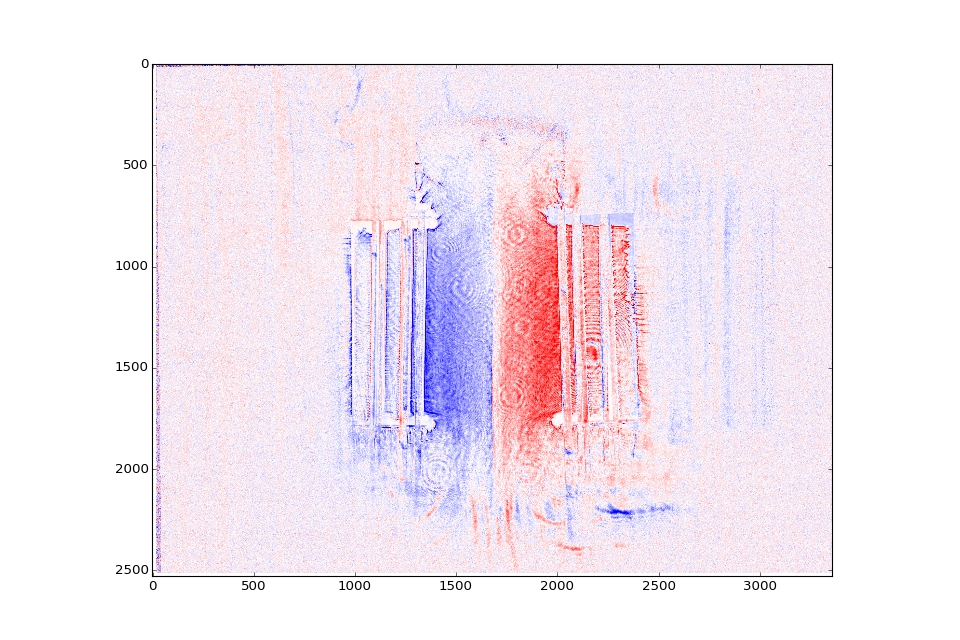

In [16]:
N0=S0/B0
N1=ST/BT
diff=N0-N1
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(diff, cmap=plt.cm.bwr,clim=[-1,1])

## Calculate Alpha

In [6]:
beta=3*np.pi/180
alpha=0.5*np.arcsin(diff*np.tan(beta)/2.0)
alpha=alpha*180/np.pi
alpha=np.nan_to_num(alpha)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


## Bring in Interferometry

In [7]:
I0=plt.imread("../s0513_15 IR side on image registration (2).jpg")
I0s=np.sum(I0,2)

In [8]:
I1=np.loadtxt("../s0513_15 neL side on.txt", delimiter=',')
I1=np.nan_to_num(I1)

In [9]:
scale=B0.shape[0]/I0.shape[0]
I0z=sp.ndimage.zoom(I0s, scale)
crop=(I0z.shape[1]-B0.shape[1])/2
I0zc=I0z[:,crop:-crop]
I0zcn=np.fliplr(I0zc/I0zc.max())

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
I1z=sp.ndimage.zoom(I1, scale)
I1zc=I1z[:,crop:-crop]
I1zc=np.fliplr(I1z[:,crop:-crop])

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [12]:
I0T, I1T, scale, angle, (t0, t1)=ir.transform_like(B0,I0zcn, I1zc)

<IPython.core.display.Javascript object>


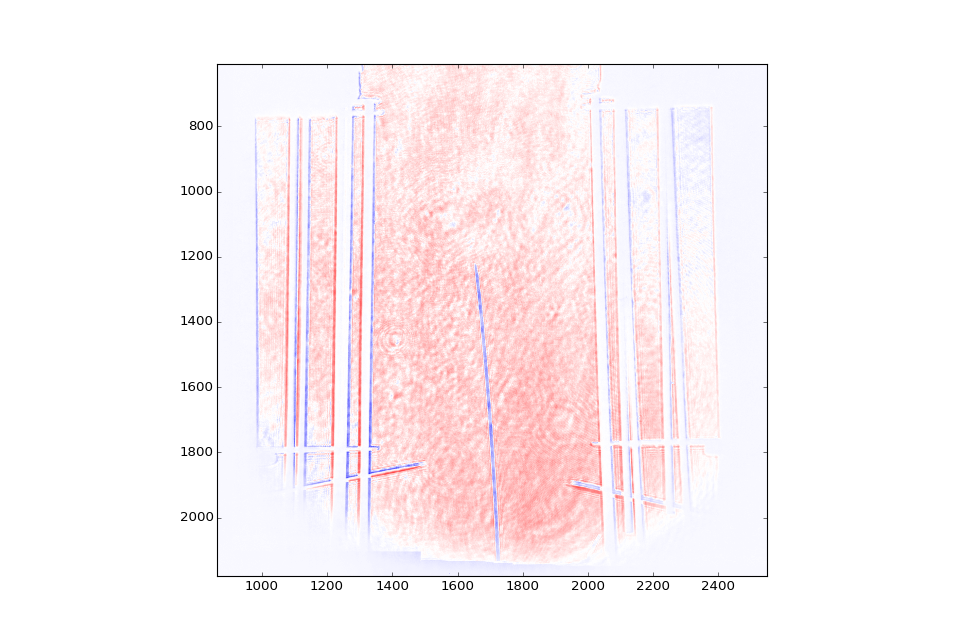

In [18]:
#check overlap of interferoemtry registration onto Faraday
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(I0T-B0/B0.max(), cmap=plt.cm.bwr,clim=[-1,1])

In [13]:
B=5.99e18*alpha/I1T

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


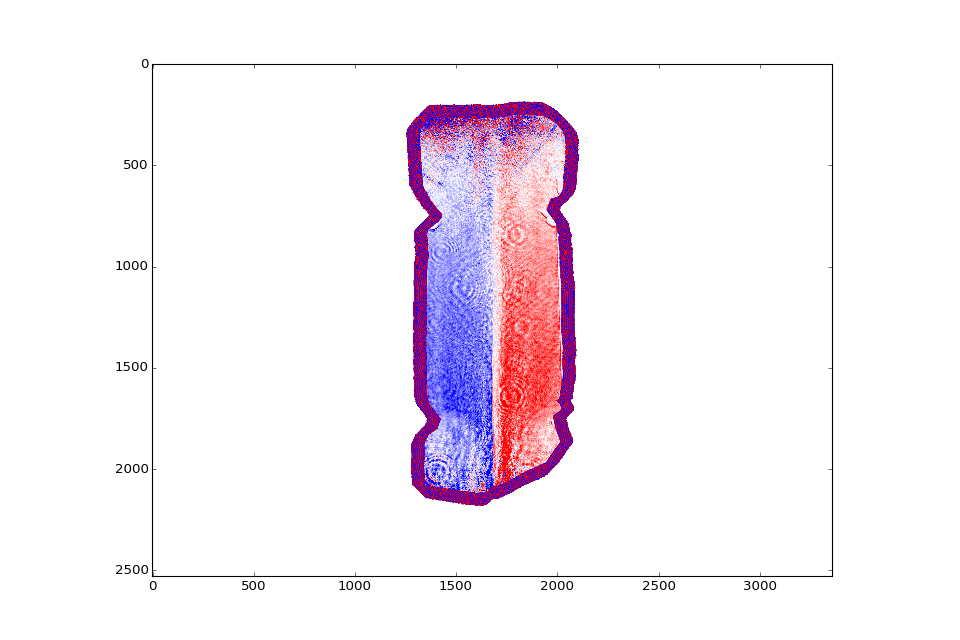

In [38]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(B, cmap=plt.cm.bwr,clim=[-5,5])

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


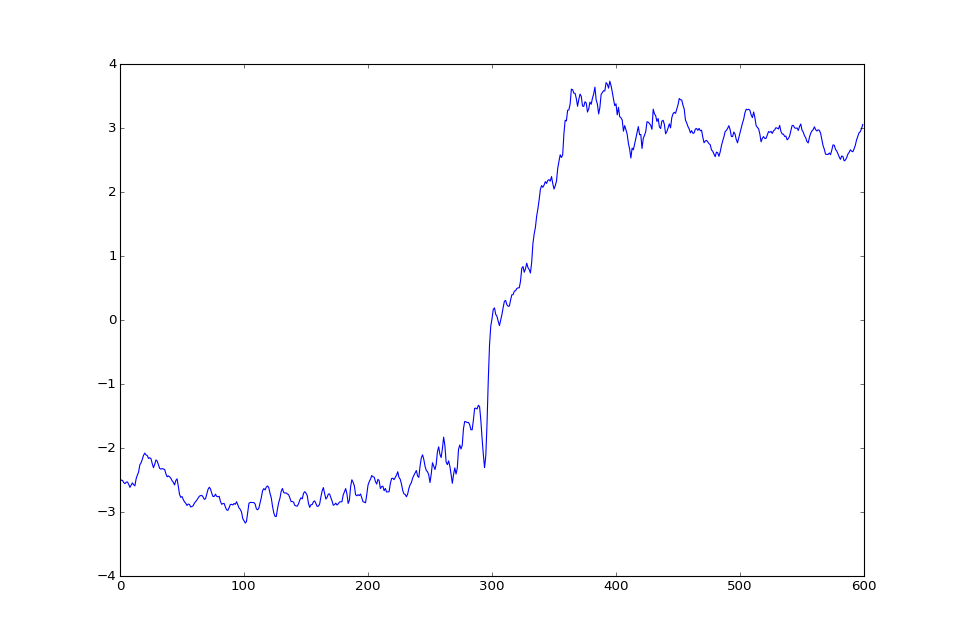

In [42]:
B_av=np.mean(B[1200:1400,1380:1980], axis=0)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(B_av)

In [44]:
import csv
filename="s0513_15 B profile"
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    for f in zip(B_av):
        cwriter.writerow(f)

 - Adding parameter for hint "B0"
 - Adding parameter for hint "y0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "y0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


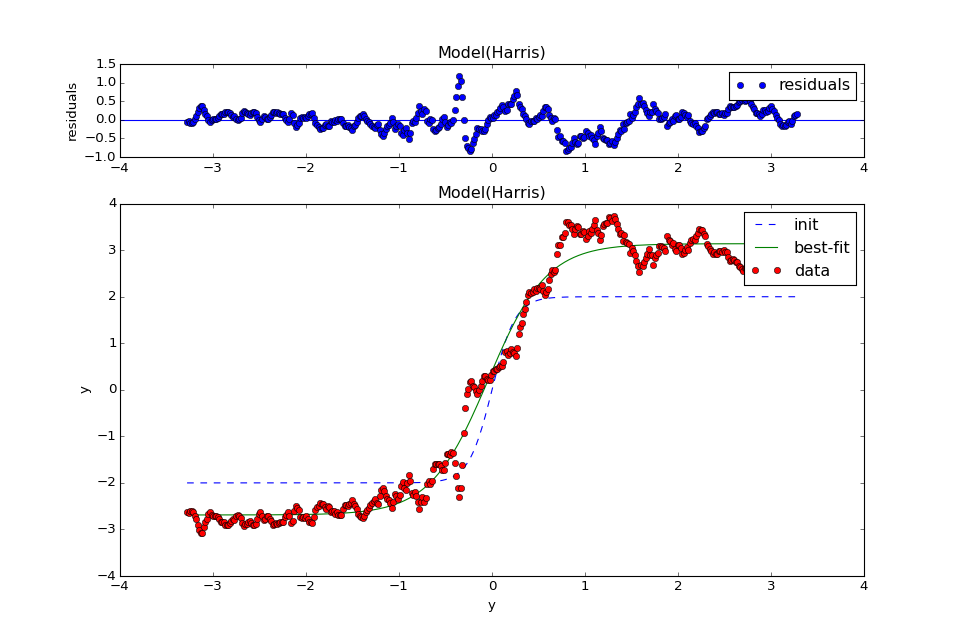

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 38
    # data points      = 400
    # variables        = 4
    chi-square         = 36.601
    reduced chi-square = 0.092
[[Variables]]
    B0:   2.91433207 +/- 0.019824 (0.68%) (init= 2)
    y0:  -0.03842056 +/- 0.010846 (28.23%) (init= 0)
    L:    0.62642380 +/- 0.018937 (3.02%) (init= 0.25)
    C:    0.22531071 +/- 0.017989 (7.98%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(y0, C)                     =  0.535 
    C(B0, L)                     =  0.523 



In [43]:
cB=316
Bs=B_av[cB-200:cB+200]
y_B=(np.linspace(cB-200,cB+200, 400)-cB)/61.0
from lmfit import Model
def Harris(y, y0, B0, L,C):
    return B0*np.tanh((y-y0)/L)+C
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(Bs, y=y_B)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(12,8)})
print(res.fit_report())

In [133]:
import csv
filename="s0513_15 B profiles"
data=zip(y_B+0.038, Bs-0.22)
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    for f in data:
        cwriter.writerow(f)

In [22]:
# Cross check with George's code
aG=np.loadtxt('s0513_15 alpha.txt', delimiter=',')

<IPython.core.display.Javascript object>


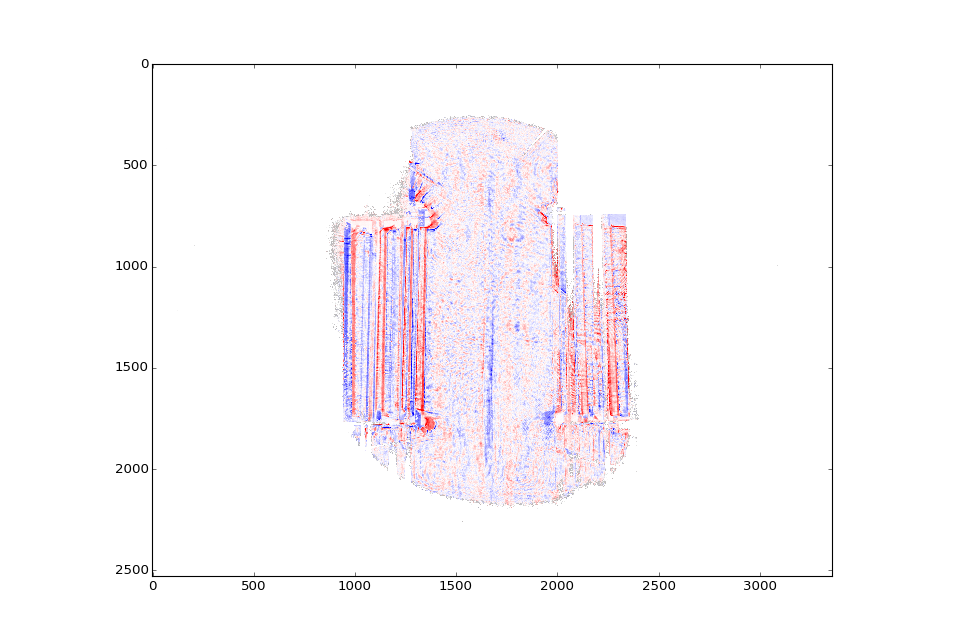

In [27]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(aG+alpha, cmap=plt.cm.bwr,clim=[-1,1])
#ax[1].imshow(alpha, cmap=plt.cm.bwr,clim=[-1,1])

# Old Code

In [ ]:
I1=np.nan_to_num(I1)
I1=I1-I1.min()
I1=np.fliplr(I1)
I1r=sp.ndimage.interpolation.zoom(I1, zoom=resize)
I1rc=I1r[:,crop/2:-crop/2]

In [ ]:
IT, I1T, scale, angle, (t0, t1)=ir.transform_like(B0,I0n, I1rc)

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(I1T)

In [ ]:
alpha=np.nan_to_num(alpha)
neL=np.ma.masked_less(I1T, 5e16)
B=5.99e18*alpha/neL

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(B,cmap=plt.cm.bwr,clim=[-10,10])

<IPython.core.display.Javascript object>


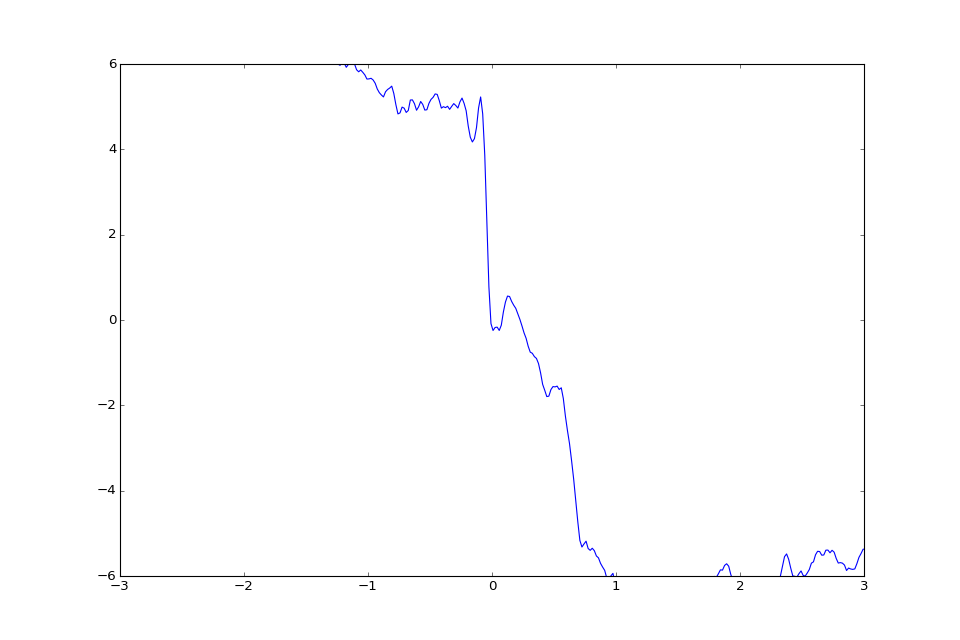

(-6, 6)

In [16]:
centre=1678
scale=60.0
y_mm=np.linspace(-centre, B.shape[1]-centre, B.shape[1])/scale
Bdz=B[850:1700,:].mean(0)
Bdz=Bdz-Bdz.mean()
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(y_mm,-Bdz)
ax.set_xlim(-3,3)
ax.set_ylim(-6,6)

# Harris Layer

<IPython.core.display.Javascript object>


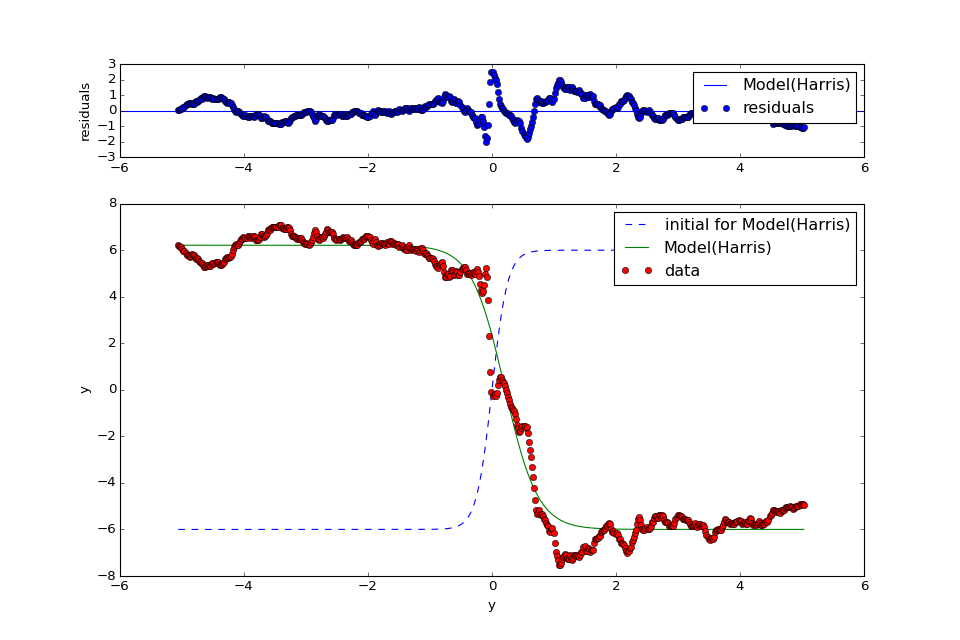

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 61
    # data points      = 606
    # variables        = 4
    chi-square         = 268.473
    reduced chi-square = 0.446
[[Variables]]
    y0:   0.20408091 +/- 0.009717 (4.76%) (init= 0)
    C:    0.10727670 +/- 0.029604 (27.60%) (init= 0)
    B0:  -6.10600587 +/- 0.030911 (0.51%) (init= 6)
    L:    0.53144063 +/- 0.016902 (3.18%) (init= 0.25)
[[Correlations]] (unreported correlations are <  0.100)
    C(y0, C)                     = -0.398 
    C(B0, L)                     = -0.370 


In [144]:
B=Bdz[1374:1980]
y=y_mm[1374:1980]
from lmfit import Model
def Harris(y, y0, B0, L,C):
    return B0*np.tanh((y-y0)/L)+C
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 6.0)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(-B, y=y)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(12,8)})
print res.fit_report()

# Comparison to previous Data

In [18]:
ang=np.loadtxt("Data/s0513_15 faraday_angle.txt", delimiter=',')

<IPython.core.display.Javascript object>


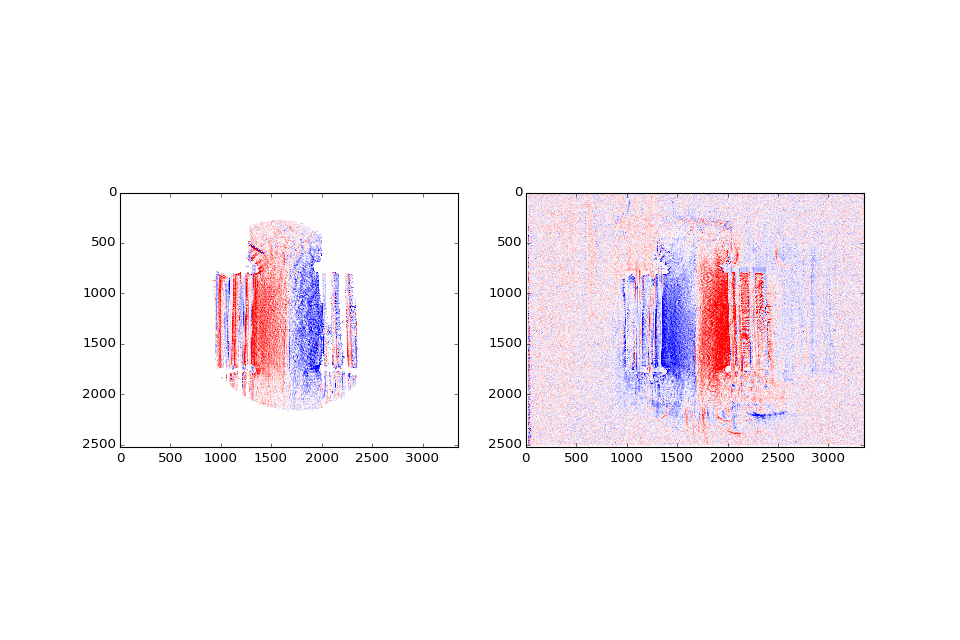

In [19]:
fig, ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(ang,cmap=plt.cm.bwr,clim=[-1,1])
ax[1].imshow(alpha,cmap=plt.cm.bwr,clim=[-1,1])

<IPython.core.display.Javascript object>


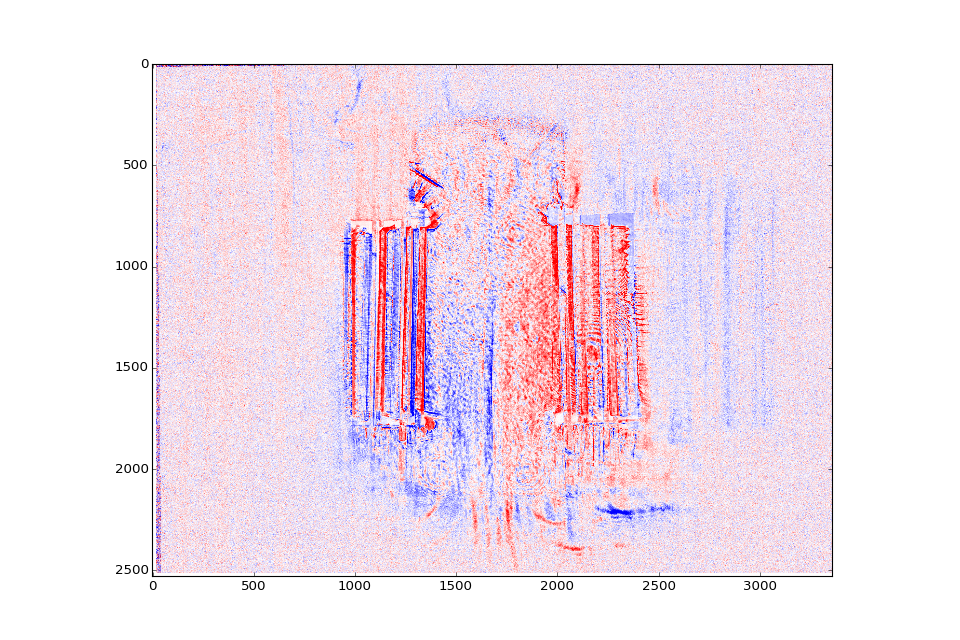

In [20]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(ang+alpha,cmap=plt.cm.bwr,clim=[-1,1])

In [135]:
S0.max()

0.4747692